# <center> ANOVA

## <center> Analysis of variance

### Are the means of different groups the same or different?

<center><img src='anova_cartoon.jpg'>

### <center> ANOVA Hypotheses

<center>Assuming we have more than two groups (1, 2, 3...k).

### Null Hypothesis (H<sub>0</sub>): µ1 = µ2 = µ3  = ...   = µk 

### Alternative Hypothesis (H<sub>a</sub>): At least one µi different

### Example

A company is wondering how they can best optimize the performance of their data scientists. They devise an experiment to test the effect of various substances on the quality of work completed by their data scientists. They come up with four groups: <br>

          Group A:  Given 150mg of caffeine
          Group B:  Given 2 ounces of alcohol
          Group C:  Given 100g of chocolate
          Group D:  Given 10 ounces of water
          
After ingesting their given substance, each data scientist was then given the same assessment. After two hours, the accuracy of each data scientist's model was evaluated and recorded and the results are shown below. With a confidence level of 95%, is there a difference in performance across the groups?


In [1]:
A = [0.92, 0.89, 0.94, 0.91, 0.79, 0.90, 0.96, 0.94, 0.92, 0.85]
B = [0.65, 0.79, 0.99, 0.48, 0.54, 0.68, 0.52, 0.49, 0.52, 0.56]
C = [0.85, 0.89, 0.91, 0.92, 0.86, 0.82, 0.94, 0.90, 0.91, 0.95]
D = [0.69, 0.75, 0.85, 0.74, 0.76, 0.85, 0.78, 0.72, 0.84, 0.86]

In [2]:
from scipy import stats
f_stat,p_value = stats.f_oneway(A,B,C,D)
print('F-stat:',f_stat)
print('p-value:',p_value)

F-stat: 19.986414188904373
p-value: 8.500667468792516e-08


Each F-distribution is unique in two values:

    - degrees of freedom of groups
    - degrees of freedom of all subjects

a = number of groups<br>
N = total number of subjects

Degrees of freedom numerator = a - 1

Degrees of freedom denominator = N - a

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,5,1000)
y = stats.f.pdf(x,3,16)
plt.plot(x,y)
plt.title('F-distribution dfn=3,dfd=16')
plt.xlabel('F-statistic')

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


Text(0.5, 0, 'F-statistic')

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


Text(0.5, 0, 'F-statistic')

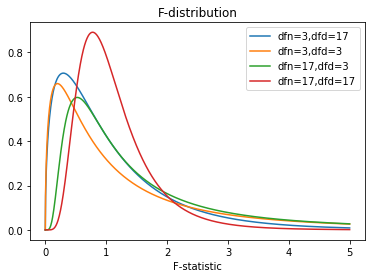

In [4]:
x = np.linspace(0,5,1000)
y = stats.f.pdf(x,3,16)
plt.plot(x,y)
y = stats.f.pdf(x,3,3)
plt.plot(x,y)
y = stats.f.pdf(x,16,3)
plt.plot(x,y)
y = stats.f.pdf(x,16,16)
plt.plot(x,y)
plt.legend(['dfn=3,dfd=17','dfn=3,dfd=3','dfn=17,dfd=3','dfn=17,dfd=17'])
plt.title('F-distribution')
plt.xlabel('F-statistic')

## <center> ANOVA is a multiple linear regression

In [5]:
import pandas as pd
df = pd.DataFrame()
df['Group'] = ['A']*len(A) + ['B']*len(B) + ['C']*len(C) + ['D']*len(D)
df['Accuracy'] = A + B + C + D
df['Group'] = df['Group'].astype('category')
df['Group_cat'] = df['Group'].cat.codes
df = pd.get_dummies(df)
df['Group'] = ['A']*len(A) + ['B']*len(B) + ['C']*len(C) + ['D']*len(D)
df.head()

,Accuracy,Group_cat,Group_A,Group_B,Group_C,Group_D,Group
0,0.92,0,1,0,0,0,A
1,0.89,0,1,0,0,0,A
2,0.94,0,1,0,0,0,A
3,0.91,0,1,0,0,0,A
4,0.79,0,1,0,0,0,A


In [6]:
means = [np.mean(x) for x in [A,B,C,D]]
means

[0.9019999999999999, 0.6220000000000001, 0.8949999999999999, 0.784]

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


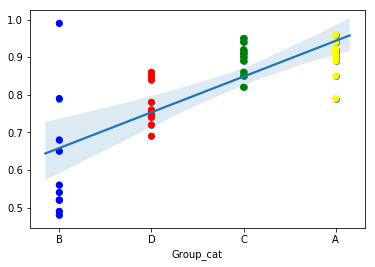

In [7]:
import seaborn as sns
sns.regplot(df['Group_cat'], B+D+C+A)
color = ['blue']*len(A) + ['red']*len(B) + ['green']*len(C) + ['yellow']*len(D)
plt.scatter(['B']*len(B)+['D']*len(D)+['C']*len(C)+['A']*len(A),B+D+C+A, c=color)

In [8]:
import statsmodels.api as sm
results = sm.OLS(df['Accuracy'], sm.add_constant(df[['Group_A','Group_B','Group_C','Group_D']])).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Accuracy   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     19.99
Date:                Wed, 13 Nov 2019   Prob (F-statistic):           8.50e-08
Time:                        13:42:44   Log-Likelihood:                 40.547
No. Observations:                  40   AIC:                            -73.09
Df Residuals:                      36   BIC:                            -66.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6406      0.012     54.716      0.000       0.617       0.664
Group_A        0.2614      0.026     10.244      0.000       0.210       0.313
Group_B       -0.0186      0.026     -0.729      0.471      -0.070       0.033
Group_C        0.2544      0.026      9.970      0.000       0.203       0.306
Group_D        0.1434      0.026      5.620      0.000       0.092       0.195
==============================================================================
Omnibus:                       28.051   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.584
Skew:                           1.668   Prob(JB):                     2.86e-16
Kurtosis:                       8.641   Cond. No.                     7.50e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.89e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
means

[0.9019999999999999, 0.6220000000000001, 0.8949999999999999, 0.784]

If you remove the constant, the coefficients are just the group means!

In [10]:
from statsmodels.formula.api import ols
sm.stats.anova_lm(ols('Accuracy ~ Group', data=df).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Group,3.0,0.513667,0.171222,19.986414,8.500667e-08
Residual,36.0,0.308410,0.008567,NaN,NaN


In [11]:
f_stat, p_value

(19.986414188904373, 8.500667468792516e-08)

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


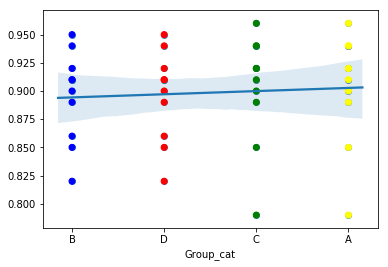

In [12]:
df_2 = df.copy()
df_2['Accuracy']= C+C+A+A
sns.regplot(df['Group_cat'], C+C+A+A)
color = ['blue']*len(A) + ['red']*len(B) + ['green']*len(C) + ['yellow']*len(D)
plt.scatter(['B']*len(C)+['D']*len(D)+['C']*len(B)+['A']*len(A),C+C+A+A, c=color)

In [13]:
sm.stats.anova_lm(ols('Accuracy ~ Group', data=df_2).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Group,3.0,0.00049,0.000163,0.078589,0.971195
Residual,36.0,0.07482,0.002078,NaN,NaN


### So there is a difference, but where is it?

## <center> Tukey's HSD

 ### <center>Honestly Significant Difference

<center>A post-hoc test

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [15]:
tukey_results = pairwise_tukeyhsd(df['Accuracy'], df['Group'])
tukey_results.summary()

group1,group2,meandiff,lower,upper,reject
A,B,-0.28,-0.3915,-0.1685,True
A,C,-0.007,-0.1185,0.1045,False
A,D,-0.118,-0.2295,-0.0065,True
B,C,0.273,0.1615,0.3845,True
B,D,0.162,0.0505,0.2735,True
C,D,-0.111,-0.2225,0.0005,False


C:\Users\Matthew\Anaconda3\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


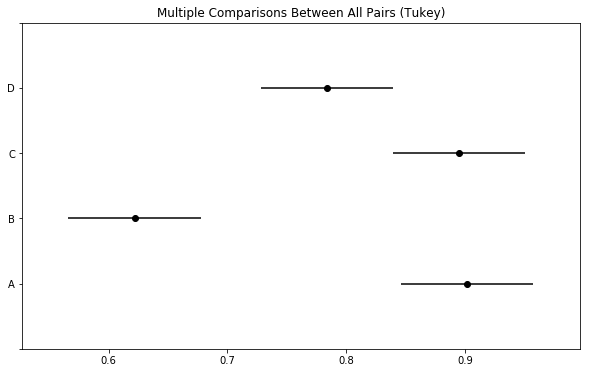

In [16]:
tukey_results.plot_simultaneous().show()

### <center>ANOVA tells you there is a difference

### <center>Tukey's tells you where the difference is

### <center>But wait, why can't we just use multiple t-tests for the comparisons?

In [17]:
p_values = [0.050, 0.042, 0.038, 0.047, 0.039, 0.045]

In [18]:
np.prod([1-p for p in p_values])

0.7657444297348428

In [19]:
p_values = p_values+p_values
np.prod([1-p for p in p_values])

0.5863645316699396

### <center>Tukey's HSD accounts for the family-wise error rate when running multiple t-tests in tandem.

What if the company also wants to consider the level of the data scientist in their analysis? <br>
Below is the data for whether each data scientist is junior, mid, or senior level where J=junior, M=mid, and S=senior.

In [20]:
A_levels = ['M', 'S', 'M', 'J', 'S', 'S', 'S', 'M', 'J', 'S']
B_levels = ['J', 'J', 'S', 'J', 'J', 'M', 'J', 'M', 'M', 'J']
C_levels = ['M', 'J', 'S', 'S', 'S', 'S', 'M', 'J', 'J', 'J']
D_levels = ['M', 'S', 'J', 'M', 'S', 'M', 'J', 'M', 'S', 'M']

## <center> Two-way ANOVA

<center> Compares groups split by two different independent factors.

### <center> Two-way ANOVA Hypotheses

### Null Hypothesis (H<sub>0</sub>): Aµ1 = Aµ2 = Aµ3  = ...   = Aµk 

### Null Hypothesis (H<sub>0</sub>): Bµ1 = Bµ2 = Bµ3  = ...   = Bµk 

### Null Hypothesis (H<sub>0</sub>): A * B = 0, or there is no interaction between A and B

### Alternative Hypothesis (H<sub>a</sub>): At least one Aµk is different

### Alternative Hypothesis (H<sub>a</sub>): At least one Bµk is different

### Alternative Hypothesis (H<sub>a</sub>): A * B != 0, or there is some interaction between A and B

In [21]:
df['Level'] = A_levels + B_levels + C_levels + D_levels

In [22]:
sm.stats.anova_lm(ols('Accuracy ~ Group*Level', data=df).fit(), typ=2)

,sum_sq,df,F,PR(>F)
Group,0.436943,3.0,28.074708,1.374994e-08
Level,0.004337,2.0,0.417975,6.624187e-01
Group:Level,0.158813,6.0,5.102081,1.191281e-03
Residual,0.145260,28.0,NaN,NaN


From this we can reject the first and third null hypotheses. There is some statistically significant differnce for the different Groups and there is some statistically significant interaction between Group and Level. <br>
We fail to reject the second null hypothesis. There is no statistically significant difference between the Level groups.

In [23]:
tukey_results = pairwise_tukeyhsd(df['Accuracy'], df['Group']+df['Level'])
tukey_results.summary()

group1,group2,meandiff,lower,upper,reject
AJ,AM,0.0183,-0.2155,0.2521,False
AJ,AS,-0.037,-0.2513,0.1773,False
AJ,BJ,-0.325,-0.5341,-0.1159,True
AJ,BM,-0.3517,-0.5855,-0.1179,True
AJ,BS,0.075,-0.2387,0.3887,False
AJ,CJ,-0.0025,-0.2243,0.2193,False
AJ,CM,-0.02,-0.2761,0.2361,False
AJ,CS,-0.0375,-0.2593,0.1843,False
AJ,DJ,-0.1,-0.3561,0.1561,False
AJ,DM,-0.143,-0.3573,0.0713,False


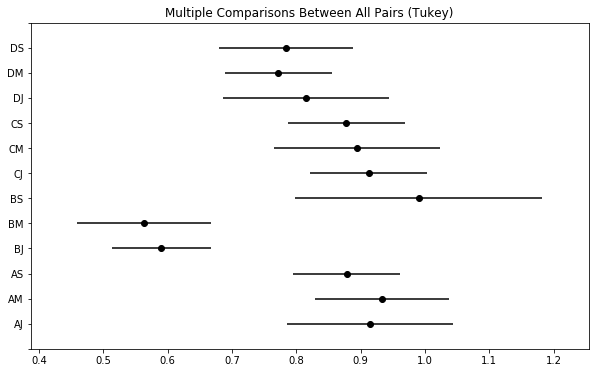

In [24]:
tukey_results.plot_simultaneous()
plt.show()

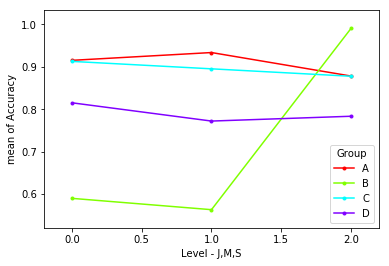

In [25]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(response=df['Accuracy'], trace=df['Group'],  x=df['Level'].astype('category').cat.codes)
plt.xlabel('Level - J,M,S')
plt.show()

# <center> Activity

A company has been testing out different ad configurations on YouTube videos. They have tried modifying the position of the ad within the video, the length of the ad, the location of the call-to-action button linking to their website, the color of the ad background, the background music, and the category of video the ad is placed on. <br><br>
They have compiled a collection of various experiments with the corresponding number of conversions, or visits to their website resulting from each ad, in the 'youtube_ad_data.csv' file. <br><br>
You have been tasked with coming up with and testing at least one hypothesis about what features have an effect on conversion. <br><br>
Using one- or two-way ANOVA, design and test a hypothesis and present the results.